In [97]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/CORD-19-research-challenge/COVID.DATA.LIC.AGMT.pdf
/kaggle/input/CORD-19-research-challenge/metadata.readme
/kaggle/input/CORD-19-research-challenge/json_schema.txt
/kaggle/input/CORD-19-research-challenge/metadata.csv
/kaggle/input/CORD-19-research-challenge/Kaggle/target_tables/3_patient_descriptions/What is the incubation period of the virus_.csv
/kaggle/input/CORD-19-research-challenge/Kaggle/target_tables/3_patient_descriptions/Incubation period across different age groups.csv
/kaggle/input/CORD-19-research-challenge/Kaggle/target_tables/3_patient_descriptions/Proportion of pediatric COVID19 patients who were asymptomatic.csv
/kaggle/input/CORD-19-research-challenge/Kaggle/target_tables/3_patient_descriptions/Manifestations of COVID-19 including but not limited to possible cardiomyopathy and cardiac arrest.csv
/kaggle/input/CORD-19-research-challenge/Kaggle/target_tables/3_patient_descriptions/How does viral load relate to disease presentations and likelihood of a po

KeyboardInterrupt: 

pd_jason file contains extracted metadata from research papers pdf . title, authors, abstract, publication date, and source of the articles. it also contains full texts of the articles . 

pmc-jason:files contain metadata such as the title, authors, abstract, publication date, and source of the articles. 

In [2]:
import os
import json
from pprint import pprint
from copy import deepcopy

import numpy as np
import pandas as pd

In [3]:
pdf_dirs = 'document_parses\pdf_json'
filenames = os.listdir(pdf_dirs)
print(filenames[:10])
print("Number of articles retrieved from our Dataset:", len(filenames))



['0000028b5cc154f68b8a269f6578f21e31f62977.json', '0000b6da665726420ab8ac9246d526f2f44d5943.json', '0000b93c66f991236db92dc16fa6db119b27ca12.json', '0000fcce604204b1b9d876dc073eb529eb5ce305.json', '000122a9a774ec76fa35ec0c0f6734e7e8d0c541.json', '00013062c83cef3b89e6c5363ea4398571000905.json', '00013694fb8095bb818b64346f791a5419d97c88.json', '0001418189999fea7f7cbe3e82703d71c85a6fe5.json', '000159d40045de3f55c9ddd5d99d760d679d4910.json', '00016663c74157a66b4d509d5c4edffd5391bbe0.json']
Number of articles retrieved from our Dataset: 7369


In [7]:
pmc_dirs = 'document_parses\pmc_json'
filenames2 = os.listdir(pmc_dirs)
print("Number of articles retrieved from our Dataset:", len(filenames2))

Number of articles retrieved from our Dataset: 905


In [8]:
all_files = []

for filename in filenames[0:10000]:
    filename = "document_parses\pdf_json\\" + filename
    file = json.load(open(filename, 'rb'))
    all_files.append(file)

In [9]:
print(all_files[0:10])

[{'paper_id': '0000028b5cc154f68b8a269f6578f21e31f62977', 'metadata': {'title': '"Multi-faceted" COVID-19: Russian experience', 'authors': []}, 'abstract': [], 'body_text': [{'text': 'According to current live statistics at the time of editing this letter, Russia has been the third country in the world to be affected by COVID-19 with both new cases and death rates rising. It remains in a position of advantage due to the later onset of the viral spread within the country since the worldwide disease outbreak.', 'cite_spans': [], 'ref_spans': [], 'section': 'Editor'}, {'text': 'The first step in "fighting" the epidemic was nationwide lock down on March 30 th , 2020.', 'cite_spans': [], 'ref_spans': [], 'section': 'Editor'}, {'text': 'Most of the multidisciplinary hospitals have been repurposed as dedicated COVID-19 centres, so the surgeons started working as infectious disease specialists. Such a reallocation of health care capacity results in the effective management of this epidemiologi

In [10]:
file = all_files[0]
print("Dictionary keys:", file.keys())

Dictionary keys: dict_keys(['paper_id', 'metadata', 'abstract', 'body_text', 'bib_entries', 'ref_entries', 'back_matter'])


USING 10 INSTEAD OF 100

In [12]:
pprint(all_files[10]['abstract'])

[{'cite_spans': [],
  'ref_spans': [],
  'section': 'Abstract',
  'text': 'As one of the frontline professionals during the coronavirus '
          '(COVID-19) pandemic, social workers can face tremendous pressure, '
          'which can lead to mental health problems. The objective of this '
          'study was to investigate whether a brief mindfulness-based '
          'intervention had short-and middle-term effects on social workers '
          'working during the COVID-19 pandemic. In a randomized controlled '
          'trial, 49 social workers were assigned to an experimental group (n '
          '= 28) or a waitlist control group (n = 21). The intervention was a '
          'four-week mindfulness-based program. The outcome variables were '
          'measured at pre-and posttest, and at one-month follow-up test. At '
          'post-test and follow-up, the workers in the experimental group '
          'reported higher mean scores in psychological flexibility and '
          's

In [9]:
pprint(all_files[4]['abstract'])

[{'cite_spans': [],
  'ref_spans': [],
  'section': 'Abstract',
  'text': 'The burden of hypertension in South Africa, as well as the '
          'successive cardiovascular morbidity and mortality is increasing. '
          'Hypertension presents a risk for subsequent cognitive impairment '
          'with age. This study sought to determine the association between '
          'blood pressure, arterial stiffness, using pulse wave velocity and '
          'pulse amplification pressure, and cognitive function in younger and '
          'older adults from a 30yr old urban South African birth cohort '
          'study.'},
 {'cite_spans': [],
  'ref_spans': [],
  'section': 'Abstract',
  'text': 'We conducted a cross-sectional study among n=93 index children (now '
          'age 29yr) and their mothers (all women). We collected peripheral '
          'and central blood pressure (BP) variables, and conducted a '
          'cognitive assessment using the Montreal Cognitive Assessment (MoCA) 

we print the value of 10th paper's body text . 
10th element of all_files is a paper or group of dictionaries whose key is body_text which we print 

In [13]:
pprint(all_files[10]['body_text'])

[{'cite_spans': [{'end': 173,
                  'ref_id': 'BIBREF18',
                  'start': 153,
                  'text': '(Haleem et al. 2020;'},
                 {'end': 201,
                  'ref_id': 'BIBREF4',
                  'start': 174,
                  'text': 'Chakraborty and Maity 2020)'},
                 {'end': 641,
                  'ref_id': 'BIBREF44',
                  'start': 613,
                  'text': '(Vindegaard and Benros 2020)'}],
  'ref_spans': [],
  'section': 'Introduction',
  'text': 'The world is currently struggling with the coronavirus disease 2019 '
          'pandemic, which has been having a devastating impact on all aspects '
          'of everyday life (Haleem et al. 2020; Chakraborty and Maity 2020) , '
          'and it appears that the effects will last for quite a while. In '
          'addition to the potentially dangerous physical health repercussions '
          'of contracting COVID-19, it causes an enormous amount of '
       

In [30]:
print("body_text content:")
pprint(file['body_text'][:2], depth=3)

body_text content:
[{'cite_spans': [],
  'ref_spans': [],
  'section': 'Editor',
  'text': 'According to current live statistics at the time of editing this '
          'letter, Russia has been the third country in the world to be '
          'affected by COVID-19 with both new cases and death rates rising. It '
          'remains in a position of advantage due to the later onset of the '
          'viral spread within the country since the worldwide disease '
          'outbreak.'},
 {'cite_spans': [],
  'ref_spans': [],
  'section': 'Editor',
  'text': 'The first step in "fighting" the epidemic was nationwide lock down '
          'on March 30 th , 2020.'}]


In [31]:
texts = [(di['section'], di['text']) for di in file['body_text']]#[(x,y),(x1,y1)]
texts_di = {di['section']: "" for di in file['body_text']}#{x:y,x1:y1}
for section, text in texts:
    texts_di[section] += text

pprint(list(texts_di.keys()))

['Editor']


In [32]:
body = ""

for section, text in texts_di.items():#{x:y,x1:y1}
    body += section#body=x
    body += "\n\n"
    body += text#body=x\n\ny
    body += "\n\n"

print(body[:3000])

Editor

According to current live statistics at the time of editing this letter, Russia has been the third country in the world to be affected by COVID-19 with both new cases and death rates rising. It remains in a position of advantage due to the later onset of the viral spread within the country since the worldwide disease outbreak.The first step in "fighting" the epidemic was nationwide lock down on March 30 th , 2020.Most of the multidisciplinary hospitals have been repurposed as dedicated COVID-19 centres, so the surgeons started working as infectious disease specialists. Such a reallocation of health care capacity results in the effective management of this epidemiological problem 1 . The staff has undergone on-line 36-hour training course to become qualified in coronavirus infection treatment.The surgeons of COVID-19 dedicated hospitals do rarely practice surgery. When ICU patients need mechanical ventilation, percutaneous tracheostomy under endoscopic control is mostly performe

In [16]:
print(all_files[0]['metadata']['title'])

"Multi-faceted" COVID-19: Russian experience


In [33]:
authors = all_files[10]['metadata']['authors']
pprint(authors[:3])

[{'affiliation': {},
  'email': '',
  'first': 'Navid',
  'last': 'Asl',
  'middle': ['R Hosseinzadeh'],
  'suffix': ''}]


In [34]:
pprint(all_files[4]['metadata'], depth=4)

{'authors': [{'affiliation': {'institution': 'Instituto de Salud Carlos III',
                              'laboratory': 'Centro de Investigación '
                                            'Biome´dica en Red Enfermedades '
                                            'Cardiovaculares (CIBERCV)',
                              'location': {...}},
              'email': '',
              'first': 'Oriol',
              'last': 'Rodríguez-Leor',
              'middle': [],
              'suffix': ''},
             {'affiliation': {'institution': 'Santiago de Compostela, A Coruña',
                              'laboratory': '',
                              'location': {...}},
              'email': '',
              'first': '',
              'last': 'Belé N Cid-Á Lvarez',
              'middle': [],
              'suffix': ''},
             {'affiliation': {'institution': 'Hospital de León',
                              'laboratory': '',
                              'location': {...

In [35]:
bibs = list(file['bib_entries'].values())
pprint(bibs[:2], depth=4)

[{'authors': [{'first': 'L', 'last': 'Tanaka', 'middle': [], 'suffix': ''},
              {'first': 'M', 'last': 'Alexandru', 'middle': [], 'suffix': ''},
              {'first': 'S', 'last': 'Jbyeh', 'middle': [], 'suffix': ''},
              {'first': 'C', 'last': 'Desbrosses', 'middle': [], 'suffix': ''},
              {'first': 'Z', 'last': 'Bouzit', 'middle': [], 'suffix': ''},
              {'first': 'G', 'last': 'Cheisson', 'middle': [], 'suffix': ''}],
  'issn': '',
  'other_ids': {},
  'pages': '253--254',
  'ref_id': 'b0',
  'title': 'A hybrid approach to tracheostomy in COVID-19 patients ensuring '
           'staff safety',
  'venue': 'Br J Surg',
  'volume': '102',
  'year': 2020},
 {'authors': [{'first': 'S', 'last': 'Khan', 'middle': [], 'suffix': ''},
              {'first': 'A', 'last': 'Mian', 'middle': [], 'suffix': ''}],
  'issn': '',
  'other_ids': {},
  'pages': '',
  'ref_id': 'b1',
  'title': 'Medical education: COVID-19 and surgery',
  'venue': 'Br J Surg',
  '

In [36]:
from tqdm.notebook import tqdm
from subprocess import check_output

In [37]:
def format_name(author):
    middle_name = " ".join(author['middle'])
    
    if author['middle']:
        return " ".join([author['first'], middle_name, author['last']])
    else:
        return " ".join([author['first'], author['last']])


def format_affiliation(affiliation):
    text = []
    location = affiliation.get('location')
    if location:
        text.extend(list(affiliation['location'].values()))
    
    institution = affiliation.get('institution')
    if institution:
        text = [institution] + text
    return ", ".join(text)
def format_authors(authors, with_affiliation=False):
    name_ls = []
    
    for author in authors:
        name = format_name(author)
        if with_affiliation:
            affiliation = format_affiliation(author['affiliation'])
            if affiliation:
                name_ls.append(f"{name} ({affiliation})")
            else:
                name_ls.append(name)
        else:
            name_ls.append(name)
    
    return ", ".join(name_ls)

def format_body(body_text):
    texts = [(di['section'], di['text']) for di in body_text]
    texts_di = {di['section']: "" for di in body_text}
    
    for section, text in texts:
        texts_di[section] += text

    body = ""

    for section, text in texts_di.items():
        body += section
        body += "\n\n"
        body += text
        body += "\n\n"
    
    return body

def format_bib(bibs):
    if type(bibs) == dict:
        bibs = list(bibs.values())
    bibs = deepcopy(bibs)
    formatted = []
    
    for bib in bibs:
        bib['authors'] = format_authors(
            bib['authors'], 
            with_affiliation=False
        )
        formatted_ls = [str(bib[k]) for k in ['title', 'authors', 'venue', 'year']]
        formatted.append(", ".join(formatted_ls))

    return "; ".join(formatted)



In [38]:
for author in authors:
    print("Name:", format_name(author))
    print("Affiliation:", format_affiliation(author['affiliation']))
    print()

Name: Navid R Hosseinzadeh Asl
Affiliation: 



In [39]:
authors = all_files[1]['metadata']['authors']

In [40]:
authors = all_files[4]['metadata']['authors']

the line below formats the name of 1st bibliographic entry 

In [41]:
format_authors(bibs[0]['authors'], with_affiliation=False)

'L Tanaka, M Alexandru, S Jbyeh, C Desbrosses, Z Bouzit, G Cheisson'

In [42]:
bib_formatted = format_bib(bibs[:5])

Cleaned files is a list of files (JSON) which are formatted using the formating function used above 
 we iterate throught the file format paper id , title ,authors with and without affiliations abstract body  bibliography. The cleaned formatted features are stored in the list called features . every file cleaned featurw is appended to cleaned_files[].

In [43]:
cleaned_files = []

for file in all_files[0:10000]:
    features = [
        file['paper_id'],
        file['metadata']['title'],
        format_authors(file['metadata']['authors']),
        format_authors(file['metadata']['authors'], 
                       with_affiliation=True),
        format_body(file['abstract']),
        format_body(file['body_text']),
        format_bib(file['bib_entries']),
        file['metadata']['authors'],
        file['bib_entries']
    ]
    
    cleaned_files.append(features)

In [44]:
col_names = [
    'paper_id', 
    'title', 
    'authors',
    'affiliations', 
    'abstract', 
    'text', 
    'bibliography',
    'raw_authors',
    'raw_bibliography'
]

clean_df = pd.DataFrame(cleaned_files, columns=col_names)
clean_df.head()

,paper_id,title,authors,affiliations,abstract,text,bibliography,raw_authors,raw_bibliography
0,0000028b5cc154f68b8a269f6578f21e31f62977,"""Multi-faceted"" COVID-19: Russian experience",,,,Editor\n\nAccording to current live statistics...,A hybrid approach to tracheostomy in COVID-19 ...,[],"{'BIBREF0': {'ref_id': 'b0', 'title': 'A hybri..."
1,0000b6da665726420ab8ac9246d526f2f44d5943,The cell phone vibration test: A telemedicine ...,"Alex Yang Ba, | Robert, J Lewis, Nora Watson, ...",Alex Yang Ba (Uniformed Services University of...,Abstract\n\nObjective: An at home-test for dif...,| INTRODUCTION\n\nAs a consequence of the glob...,Incidence of sudden sensorineural hearing loss...,"[{'first': 'Alex', 'middle': ['Yang'], 'last':...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Inciden..."
2,0000b93c66f991236db92dc16fa6db119b27ca12,Infections in Hematopoietic Stem Cell Transpla...,"Biju George, Sanjay Bhattacharya","Biju George (Christian Medical College, Vellor...",,Introduction\n\nInfections are an important ca...,Invasive mold infections in allogeneic bone ma...,"[{'first': 'Biju', 'middle': [], 'last': 'Geor...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Invasiv..."
3,0000fcce604204b1b9d876dc073eb529eb5ce305,,"Miguel Montserrat, Barcons Marqués, Blanca Cha...","Miguel Montserrat, Barcons Marqués (Servicio d...",Abstract\n\nContribución de los autores: Rocío...,Introducción: Las residencias de personas mayo...,"Un perfil de las personas mayores en España, A...","[{'first': 'Miguel', 'middle': [], 'last': 'Mo...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Un perf..."
4,000122a9a774ec76fa35ec0c0f6734e7e8d0c541,Impact of COVID-19 on ST-segment elevation myo...,"Oriol Rodríguez-Leor, Belé N Cid-Á Lvarez, Ar...",Oriol Rodríguez-Leor (Instituto de Salud Carlo...,Abstract\n\nIntroduction and objectives: The C...,\n\nIntroduction and objectives: The COVID-19 ...,APPENDIX. WORKING GROUP ON THE INFARCT CODE OF...,"[{'first': 'Oriol', 'middle': [], 'last': 'Rod...","{'BIBREF0': {'ref_id': 'b0', 'title': 'APPENDI..."


we give column names for the cleaned set of file features and create a separate dataframe with list of list-***list of features*** and list of columns 

converting cleaned seyt of files into a separate coma seperated vales file for better and faster computation 

In [45]:
clean_df.to_csv('first_paper_pdf.csv', index=False)  

In [46]:
print(len(cleaned_files))

7369


In [47]:
print("Dictionary keys:", all_files[0].keys())

Dictionary keys: dict_keys(['paper_id', 'metadata', 'abstract', 'body_text', 'bib_entries', 'ref_entries', 'back_matter'])


In [50]:
meta_df = pd.read_csv("metadata.csv") 
nRow, nCol = meta_df.shape
print(f'There are {nRow} rows and {nCol} columns')

C:\Users\saumy\AppData\Local\Temp\ipykernel_26828\296488690.py:1: DtypeWarning: Columns (1,4,5,6,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  meta_df = pd.read_csv("metadata.csv")


There are 1056660 rows and 19 columns


In [51]:
meta_df.head(100)

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id
0,ug7v899j,d1aafb70c066a2068b02786f8929fd9c900897fb,PMC,Clinical features of culture-proven Mycoplasma...,10.1186/1471-2334-1-6,PMC35282,11472636,no-cc,OBJECTIVE: This retrospective chart review des...,2001-07-04,"Madani, Tariq A; Al-Ghamdi, Aisha A",BMC Infect Dis,NaN,NaN,NaN,document_parses/pdf_json/d1aafb70c066a2068b027...,document_parses/pmc_json/PMC35282.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,NaN
1,02tnwd4m,6b0567729c2143a66d737eb0a2f63f2dce2e5a7d,PMC,Nitric oxide: a pro-inflammatory mediator in l...,10.1186/rr14,PMC59543,11667967,no-cc,Inflammatory diseases of the respiratory tract...,2000-08-15,"Vliet, Albert van der; Eiserich, Jason P; Cros...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/6b0567729c2143a66d737...,document_parses/pmc_json/PMC59543.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
2,ejv2xln0,06ced00a5fc04215949aa72528f2eeaae1d58927,PMC,Surfactant protein-D and pulmonary host defense,10.1186/rr19,PMC59549,11667972,no-cc,Surfactant protein-D (SP-D) participates in th...,2000-08-25,"Crouch, Erika C",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/06ced00a5fc04215949aa...,document_parses/pmc_json/PMC59549.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
3,2b73a28n,348055649b6b8cf2b9a376498df9bf41f7123605,PMC,Role of endothelin-1 in lung disease,10.1186/rr44,PMC59574,11686871,no-cc,Endothelin-1 (ET-1) is a 21 amino acid peptide...,2001-02-22,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/348055649b6b8cf2b9a37...,document_parses/pmc_json/PMC59574.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
4,9785vg6d,5f48792a5fa08bed9f56016f4981ae2ca6031b32,PMC,Gene expression in epithelial cells in respons...,10.1186/rr61,PMC59580,11686888,no-cc,Respiratory syncytial virus (RSV) and pneumoni...,2001-05-11,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/5f48792a5fa08bed9f560...,document_parses/pmc_json/PMC59580.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,63bos83o,435baf47b4f78fc06a8376f451993059407d2972,PMC,Global Surveillance of Emerging Influenza Viru...,10.1371/journal.pone.0000489,PMC1876795,17534439,cc0,BACKGROUND: Effective influenza surveillance r...,2007-05-30,"Sampath, Rangarajan; Russell, Kevin L.; Massir...",PLoS One,NaN,NaN,NaN,document_parses/pdf_json/435baf47b4f78fc06a837...,document_parses/pmc_json/PMC1876795.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...,NaN
96,hqc7u9w3,c65f0939cf35a0f04bf93bd6e8f771b8521563a5,PMC,Transmission Parameters of the 2001 Foot and M...,10.1371/journal.pone.0000502,PMC1876810,17551582,cc-by,"Despite intensive ongoing research, key aspect...",2007-06-06,"Chis Ster, Irina; Ferguson, Neil M.",PLoS One,NaN,NaN,NaN,document_parses/pdf_json/c65f0939cf35a0f04bf93...,document_parses/pmc_json/PMC1876810.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...,NaN
97,87zt7lew,8f5770d87614bb85a6c7b64c26f1757226137d23,PMC,Efficient replication of pneumonia virus of mi...,10.1186/1743-422x-4-48,PMC1891281,17547763,cc-by,Pneumonia virus of mice (PVM; family Paramyxov...,2007-06-04,"Dyer, Kimberly D; Schellens, Ingrid MM; Bonvil...",Virol J,NaN,NaN,NaN,document_parses/pdf_json/8f5770d87614bb85a6c7b...,document_parses/pmc_json/PMC1891281.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...,NaN
98,wgxt36jv,418f1b85e589f3ac37ffc37075b6e558e510fa74,PMC,Designing and conducting tabletop exercises to...,10.1186/1471-2458-7-92,PMC1894789,17535426,cc-by,"BACKGROUND: Since 2001, state and local health...",2007-05-29,"Dausey, David J; Buehler, James W; Lurie, Nicole",BMC Public Health,NaN,NaN,NaN,document_parses/pdf_json/418f1b85e589f3ac37ffc...,document

In [52]:
meta_df.columns

Index(['cord_uid', 'sha', 'source_x', 'title', 'doi', 'pmcid', 'pubmed_id',
       'license', 'abstract', 'publish_time', 'authors', 'journal', 'mag_id',
       'who_covidence_id', 'arxiv_id', 'pdf_json_files', 'pmc_json_files',
       'url', 's2_id'],
      dtype='object')

isna()--> finds the values missing from the specified column . So here we have found no. of records that no SHA walues 

In [53]:
meta_df['sha'].isna().sum()

682894

In [54]:
meta_df['sha'].head(5)

0    d1aafb70c066a2068b02786f8929fd9c900897fb
1    6b0567729c2143a66d737eb0a2f63f2dce2e5a7d
2    06ced00a5fc04215949aa72528f2eeaae1d58927
3    348055649b6b8cf2b9a376498df9bf41f7123605
4    5f48792a5fa08bed9f56016f4981ae2ca6031b32
Name: sha, dtype: object

we create a dtaframe which is subset of meta_df where the sha values are ***not missing***

In [55]:
meta_df1=meta_df[meta_df['sha'].notnull()]
print(len(meta_df1))

373766


In [ ]:
#we create a final data frame with cleaned features list and retain the column order without sorting them and ignore the default serial number . 

In [56]:
final_df = pd.concat([clean_df], ignore_index=True, sort =False)

In [57]:
print(len(final_df))

7369


for now the columns of final df are same as the all_files list or keys ; 

In [58]:
final_df.columns

Index(['paper_id', 'title', 'authors', 'affiliations', 'abstract', 'text',
       'bibliography', 'raw_authors', 'raw_bibliography'],
      dtype='object')

In [59]:
final_df['paper_id'][:5]

0    0000028b5cc154f68b8a269f6578f21e31f62977
1    0000b6da665726420ab8ac9246d526f2f44d5943
2    0000b93c66f991236db92dc16fa6db119b27ca12
3    0000fcce604204b1b9d876dc073eb529eb5ce305
4    000122a9a774ec76fa35ec0c0f6734e7e8d0c541
Name: paper_id, dtype: object

In [60]:
final_df['paper_id'].isna().sum() #there are 0 records with missing paper id 

0

the snippet below prints the no. of papers that are common to both the meta_df and cleaned Df that is finds the intersection of files . 

In [61]:
print(len(list(set(meta_df1['sha'])&set(clean_df['paper_id']))))

6408


The code merges the 2 datasets meta_df and final_df using ***inner join*** which is the result dataframe would contain only records that are common to both 


In [62]:
pd_merge_all= pd.merge(meta_df, final_df, how='inner',left_on='sha', right_on='paper_id')
print(len(pd_merge_all))

6408


In [63]:
pd_merge_all.columns

Index(['cord_uid', 'sha', 'source_x', 'title_x', 'doi', 'pmcid', 'pubmed_id',
       'license', 'abstract_x', 'publish_time', 'authors_x', 'journal',
       'mag_id', 'who_covidence_id', 'arxiv_id', 'pdf_json_files',
       'pmc_json_files', 'url', 's2_id', 'paper_id', 'title_y', 'authors_y',
       'affiliations', 'abstract_y', 'text', 'bibliography', 'raw_authors',
       'raw_bibliography'],
      dtype='object')

we are slecting all the columns as listed above 

In [64]:
pd_merge_all=pd_merge_all[['cord_uid', 'sha', 'source_x', 'title_x', 'doi', 'pmcid', 'pubmed_id',
       'license', 'abstract_x', 'publish_time', 'authors_x', 'journal',
       'mag_id', 'who_covidence_id', 'arxiv_id', 'pdf_json_files',
       'pmc_json_files', 'url', 's2_id', 'paper_id', 'title_y', 'authors_y',
       'affiliations', 'abstract_y', 'text', 'bibliography', 'raw_authors',
       'raw_bibliography']]

next, we drop all the records which have missing SHA values or text values . dropna() function drops all the records which hav NaN in the column . 

In [65]:
pd_merge_all=pd_merge_all.dropna(subset=['sha', 'text']) 

In [66]:
import re
import nltk
import string

In [67]:
pd_merge_all=pd_merge_all[pd_merge_all['title_x']!='nan']
pd_merge_all.head(3)

,cord_uid,sha,source_x,title_x,doi,pmcid,pubmed_id,license,abstract_x,publish_time,...,s2_id,paper_id,title_y,authors_y,affiliations,abstract_y,text,bibliography,raw_authors,raw_bibliography
0,wnnsmx60,025339bfce1cb8efa81c5accdabefe04dcdac9d2,PMC,Managing emerging infectious diseases: Is a fe...,10.1186/1743-8462-1-7,PMC544965,15679928,cc-by,In the 1980's and 1990's HIV/AIDS was the emer...,2004-11-19,...,NaN,025339bfce1cb8efa81c5accdabefe04dcdac9d2,Managing emerging infectious diseases: Is a fe...,Genevieve Howse,"Genevieve Howse (La Trobe University, Vic, Aus...",Abstract\n\nIn the 1980's and 1990's HIV/AIDS ...,\n\nThe management of infectious diseases in a...,"Human Rights and the HIV Paradox, Justice Kirb...","[{'first': 'Genevieve', 'middle': [], 'last': ...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Human R..."
1,zowp10ts,03203ab50eb64271a9e825f94a1b1a6c46ea14b3,PMC,Recombination Every Day: Abundant Recombinatio...,10.1371/journal.pbio.0030089,PMC1054884,15737066,cc-by,Viral recombination can dramatically impact ev...,2005-03-01,...,NaN,03203ab50eb64271a9e825f94a1b1a6c46ea14b3,Recombination Every Day: Abundant Recombinatio...,"Remy Froissart, Denis Roze, Marilyne Uzest, Li...",Remy Froissart (Institut National de la Recher...,Abstract\n\nViral recombination can dramatical...,Introduction\n\nAs increasing numbers of full-...,The evolutionary genomics of pathogen recombin...,"[{'first': 'Remy', 'middle': [], 'last': 'Froi...","{'BIBREF0': {'ref_id': 'b0', 'title': 'The evo..."
2,fae3sczm,00acd3fd31ed0cde8df286697caefc5298e54df1,PMC,Distinguishing Molecular Features and Clinical...,10.1371/journal.pone.0001847,PMC2268738,18382652,cc-by,BACKGROUND: Human rhinoviruses (HRVs) are the ...,2008-04-02,...,NaN,00acd3fd31ed0cde8df286697caefc5298e54df1,Distinguishing Molecular Features and Clinical...,"Peter Mcerlean, Laura A Shackelton, Emily Andr...","Peter Mcerlean (Royal Children's Hospital, Bri...",Abstract\n\nBackground: Human rhinoviruses (HR...,Introduction\n\nHuman rhinoviruses (HRVs) are ...,Molecular characterization of a variant rhinov...,"[{'first': 'Peter', 'middle': [], 'last': 'Mce...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Molecul..."


In [49]:
pd_merge_all=pd_merge_all[pd_merge_all['abstract_x']!='nan']
pd_merge_all.head(3)


,cord_uid,sha,source_x,title_x,doi,pmcid,pubmed_id,license,abstract_x,publish_time,...,s2_id,paper_id,title_y,authors_y,affiliations,abstract_y,text,bibliography,raw_authors,raw_bibliography
0,6iu1dtyl,6e8517cb25ff228cb48da90a9c97d9c274dc8031,PMC,The site of origin of the 1918 influenza pande...,10.1186/1479-5876-2-3,PMC340389,14733617,no-cc,NaN,2004-01-20,...,NaN,6e8517cb25ff228cb48da90a9c97d9c274dc8031,Journal of Translational Medicine The site of ...,John M Barry,John M Barry (the Center for Bioenvironmental ...,,\n\nThe 1918-1919 influenza pandemic killed mo...,The Great Influenza: the Epic Story of the Dea...,"[{'first': 'John', 'middle': ['M'], 'last': 'B...","{'BIBREF0': {'ref_id': 'b0', 'title': 'The Gre..."
1,e62cfqt7,b022e6ee1e7b9a0a822b1255c2fa12f81ddc52fd,PMC,A Gene Encoding Sialic-Acid-Specific 9-O-Acety...,10.1155/s1110724304307084,PMC551583,15292578,no-cc,"Using differential display RT-PCR, we identifi...",2004-07-29,...,NaN,b022e6ee1e7b9a0a822b1255c2fa12f81ddc52fd,A Gene Encoding Sialic-Acid-Specific 9-O-Acety...,"Hu Zhu, Hsiao Chang Chan, Zuoming Zhou, Jianmi...","Hu Zhu (Nanjing Medical University, 210029, Na...","Abstract\n\nUsing differential display RT-PCR,...",INTRODUCTION\n\nSialic acids are a diverse fam...,"Biological Roles of Sialic Acids, A Rosenberg,...","[{'first': 'Hu', 'middle': [], 'last': 'Zhu', ...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Biologi..."
2,l3z27806,7d624acf891472c3452b1deb89e0dc44a40d0c94,PMC,GIDEON: a comprehensive Web-based resource for...,10.1186/1476-072x-4-10,PMC1090610,15847698,cc-by,GIDEON (Global Infectious Diseases and Epidemi...,2005-04-22,...,NaN,7d624acf891472c3452b1deb89e0dc44a40d0c94,International Journal of Health Geographics GI...,"Open Access, Stephen A Berger","Open Access (Tel Aviv Medical Center, 6 Weitzm...",Abstract\n\nGIDEON (Global Infectious Diseases...,"Introduction\n\nAs of 2005, the world is confr...",Global infectious diseases and epidemiology ne...,"[{'first': 'Open', 'middle': [], 'last': 'Acce...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Global ..."


In [1]:
pd_merge_all.head()

NameError: name 'pd_merge_all' is not defined

***DATA CLEANING***

we create a function to clean the merged data set which drops the rows which have missing value for the specified column , the missing values are replace with an empty string , convert all the strings in the column to lower case , and remove punctuation from the texts in the given column using string.punctuation function . 

**lamda function is used with apply() function to apply a python function like lower() to all the records in the pandas dataframe**

In [69]:
def clean_dfonecol(new_df,col):
    print(col)
    new_df=pd_merge_all.replace(np.nan,'',regex = True)
    new_df = new_df[pd.notnull(new_df[col])] 
    # lower case
    new_df[col] = new_df[col].apply(lambda x: x.lower()) 
    #punctuation
    new_df[col] = new_df[col].apply(lambda x: x.translate(str.maketrans('','',string.punctuation)))
    return new_df


we clean the merged dataframe , based on three columns which we decide would act as a filter for search. 

In [70]:
pd_merge_all=clean_dfonecol(pd_merge_all,'title_x')
pd_merge_all=clean_dfonecol(pd_merge_all,'abstract_x')
pd_merge_all=clean_dfonecol(pd_merge_all,'text') 

title_x
abstract_x
text


we look at a slected view with only title abstract and text of the cleaned article dataset . 

In [71]:
pd_merge_all.head()[['title_x','abstract_x','text']]

,title_x,abstract_x,text
0,managing emerging infectious diseases is a fed...,in the 1980s and 1990s hivaids was the emergin...,\n\nthe management of infectious diseases in a...
1,recombination every day abundant recombination...,viral recombination can dramatically impact ev...,introduction\n\nas increasing numbers of fulll...
2,distinguishing molecular features and clinical...,background human rhinoviruses hrvs are the mos...,introduction\n\nhuman rhinoviruses hrvs are th...
3,activation of the unfolded protein response is...,poreforming toxins pfts constitute the single ...,introduction\n\nporeforming toxins pfts are th...
4,avian influenza virus glycoproteins restrict v...,transmission of avian influenza viruses from b...,introduction\n\ninfluenza viruses circulating ...


we create a function to remove stopwords from the specified columns - stopwords include any word in the list of stopwords or any word which is less than or equal to 2 characters longs 

In [72]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')
    
def remv_stopwords(new_df,col):
# remove stopwords
    new_df[col]= new_df[col].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
    new_df[col]= new_df[col].str.findall('\w{2,}').str.join(' ')
    return new_df

pd_merge_all=remv_stopwords(pd_merge_all,'abstract_x')
pd_merge_all=remv_stopwords(pd_merge_all,'text')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saumy\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [73]:
pd_merge_all.head()[['title_x','abstract_x','text']]

,title_x,abstract_x,text
0,managing emerging infectious diseases is a fed...,1980s 1990s hivaids emerging infectious diseas...,management infectious diseases increasingly co...
1,recombination every day abundant recombination...,viral recombination dramatically impact evolut...,introduction increasing numbers fulllength vir...
2,distinguishing molecular features and clinical...,background human rhinoviruses hrvs frequently ...,introduction human rhinoviruses hrvs frequentl...
3,activation of the unfolded protein response is...,poreforming toxins pfts constitute single larg...,introduction poreforming toxins pfts single pr...
4,avian influenza virus glycoproteins restrict v...,transmission avian influenza viruses bird huma...,introduction influenza viruses circulating hum...


In [74]:
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import preprocess_documents, preprocess_string

simple_preprocess ----> preprocesses a single document and applies basic text cleaning like tokenizing and punctuations . 
process_documents,preprocess_string------> These functions are used to preprocess a ***list of documents*** or a single document, respectively, using a series of text preprocessing steps defined in the gensim library, such as removing stopwords, lemmatizing, and stemming. 

tokenising the abstarct

In [ ]:
#The code performs a data preprocessing step on the 'abstract_x' column of a pandas DataFrame called 'pd_merge_all'. Specifically, it fills any missing values in the 'abstract_x' column with an empty string, applies a function called 'preprocess_string' to each element of the 'abstract_x' column, and returns the result as a new pandas Series called 'pd_merge_abstract_tokens'

In [75]:
pd_merge_abstract_tokens = pd_merge_all.abstract_x.fillna('').apply(preprocess_string)

tokenising the text to word

acts just like the previous code snippet on text column , fills NaN column with empty string and tokenizes evry value in text field . 

In [76]:
pd_merge_text_tokens = pd_merge_all.text.fillna('').apply(preprocess_string)

In [77]:
pd_merge_abstract_tokens

0       [hivaid, emerg, infecti, diseas, saw, emerg, s...
1       [viral, recombin, dramat, impact, evolut, epid...
2       [background, human, rhinovirus, hrv, frequent,...
3       [poreform, toxin, pft, constitut, singl, large...
4       [transmiss, avian, influenza, virus, bird, hum...
                              ...                        
6403    [report, aim, highlight, import, integr, lung,...
6404                                                   []
6405    [background, shortterm, forecast, infecti, dis...
6406    [radiolog, characterist, novel, coronaviru, nc...
6407    [background, variat, host, attribut, influenc,...
Name: abstract_x, Length: 6408, dtype: object

In [78]:
pd_merge_text_tokens

0       [manag, infecti, diseas, increasingli, complex...
1       [introduct, increas, number, fulllength, viral...
2       [introduct, human, rhinovirus, hrv, frequent, ...
3       [introduct, poreform, toxin, pft, singl, preva...
4       [introduct, influenza, virus, circul, human, p...
                              ...                        
6403    [introduct, lung, ultrasound, gain, popular, y...
6404    [author, systemat, review, second, seri, impac...
6405    [introduct, confirm, case, januari, covid, epi...
6406    [introduct, decemb, seri, pneumonia, case, lin...
6407    [field, aloccur, exhibit, greater, chanc, infe...
Name: text, Length: 6408, dtype: object

processing specifically abstract from meta dataframe 

In [79]:
meta_df1=clean_dfonecol(meta_df1,"abstract_x")

abstract_x


removing stopwords from the data frame chosen 

In [80]:
meta_df1=remv_stopwords(meta_df1,'abstract_x')

original sequencing 

In [81]:
meta_df1.reset_index(inplace=True)

text1 contains the whole abstract as a single string and loc[] fucntion takes values of particular rows . text 2 conatins tokenized version of abstract.

In [82]:
text1=[]
for i in range(len(meta_df1)):
    text1.append(meta_df1['abstract_x'].loc[i])
text2=[]
for i in range(len(meta_df1)):
    text2.append(meta_df1['abstract_x'].loc[i].split())

In [83]:
import gensim
from gensim import corpora
from pprint import pprint

every token in text2 is mapped to unique integer value 

In [84]:
dictionary = corpora.Dictionary(text2)
print(dictionary)

Dictionary<49458 unique tokens: ['1980s', '1990s', '2003', '2004', 'age']...>


In [85]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [86]:
stopwords = set(STOPWORDS)

creating a pictorial representation of the most frequent and least frequent words in the files .

In [87]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

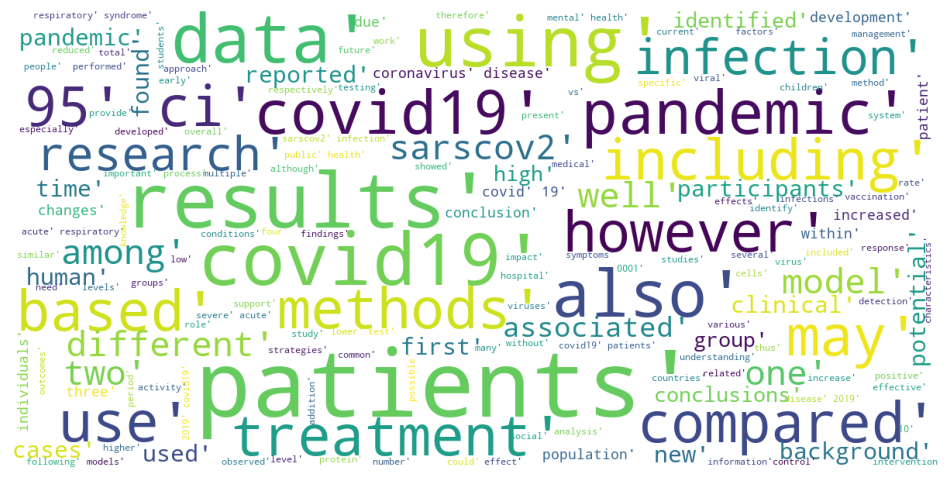

In [88]:
show_wordcloud(text2)

In [89]:
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import preprocess_documents, preprocess_string

In [90]:
meta_df_tokens = meta_df1.abstract_x.fillna('').apply(preprocess_string) 

we do the same with meta_df1 abstract by removing NaN values with empty string and removing stopwords and tokenising them using gensim preprocess-string function applied to all the rows . 

In [91]:
meta_df_tokens[100]

['object',
 'investig',
 'clinic',
 'laboratori',
 'featur',
 'patient',
 'influenza',
 'viru',
 'infect',
 'hospit',
 'pandem',
 'method',
 'prospect',
 'observ',
 'studi',
 'compar',
 'clinic',
 'laboratori',
 'characterist',
 'influenza',
 'posit',
 'neg',
 'patient',
 'influenzalik',
 'ill',
 'ili',
 'result',
 'octob',
 'februari',
 'ili',
 'patient',
 'admit',
 'test',
 'posit',
 'influenza',
 'patient',
 'infect',
 'younger',
 'year',
 'year',
 'patient',
 'pregnant',
 'allergi',
 'asthma',
 'posit',
 'patient',
 'febril',
 'higher',
 'preval',
 'headach',
 'lower',
 'valu',
 'creactiv',
 'protein',
 'pgdl',
 'pgdl',
 'procalcitonin',
 'µgl',
 'µgl',
 'leukocyt',
 'count',
 'higher',
 'valu',
 'troponin',
 'µgl',
 'posit',
 'patient',
 'bacteri',
 'infect',
 'neg',
 'group',
 'conclus',
 'studi',
 'patient',
 'infect',
 'influenza',
 'differ',
 'neg',
 'ili',
 'patient',
 'clinic',
 'laboratori',
 'characterist',
 'observ',
 'investig',
 'result',
 'studi',
 'suggest',
 'specif'

In [ ]:
# from rank_bm25 import BM25Okapi

In [92]:
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import preprocess_documents, preprocess_string
# tockenize abstract
meta_df_tokens = meta_df1.abstract_x.fillna('').apply(preprocess_string) 


In [93]:
# tockenize abstract
pd_merge_abstract_tokens = pd_merge_all.abstract_x.fillna('').apply(preprocess_string)  # tokenize each abstract to word
# tockenize the text
pd_merge_text_tokens = pd_merge_all.text.fillna('').apply(preprocess_string)  # tokenize each textto word

In [94]:
meta_df_tokens[:100]

0     [hivaid, emerg, infecti, diseas, saw, emerg, s...
1     [viral, recombin, dramat, impact, evolut, epid...
2     [background, human, rhinovirus, hrv, frequent,...
3     [poreform, toxin, pft, constitut, singl, large...
4     [transmiss, avian, influenza, virus, bird, hum...
                            ...                        
95    [influenza, vaccin, remain, primari, method, p...
96    [recent, potenti, outbreak, infecti, diseas, t...
97    [infecti, diseas, major, global, public, healt...
98    [applic, clinic, pharmacolog, concept, therape...
99                                                   []
Name: abstract_x, Length: 100, dtype: object

omw - open multilingual wordnet is database of words organised according to their similar meaning s

In [95]:
nltk.download('omw-1.4')
from nltk.corpus import wordnet
nltk.download('wordnet')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\saumy\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\saumy\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [96]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\saumy\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [97]:
from nltk.corpus import wordnet

module giving access to the database WordNet which has words with similar meaning organised . 

In [78]:
nltk.download('wordnet')

[nltk_data] Error loading wordnet: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>


False

In [81]:
import nltk
nltk.download('wordnet')

[nltk_data] Error loading wordnet: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>


False

function to find set of synonyms for a word 

In [98]:
def find_syn_ant(word):
    synonyms = []
    antonyms = []

    for syn in wordnet.synsets(word):
        for l in syn.lemmas():
            synonyms.append(l.name())
            if l.antonyms():
                antonyms.append(l.antonyms()[0].name())
    return set(synonyms)


In [99]:
print(find_syn_ant("smoking"))

{'fume', 'smoke', 'smoking'}


In [178]:
# from rank_bm25 import BM25Okapi

ModuleNotFoundError: No module named 'rank_bm25'

In [82]:
# !pip install rank_bm25 nltk

ERROR: Could not find a version that satisfies the requirement rank_bm25 (from versions: none)
ERROR: No matching distribution found for rank_bm25


rank_BM25--->matching algorithm *best matching* algorithm generally used in search engines. 

BM25Okapi--> is a varient of ranking algorithm best meatching which also takes frequncy of words in a document and relevance into account . 

In [101]:
import rank_bm25
from rank_bm25 import BM25Okapi

!python -m pip install --upgrade pip

In [1]:
!python -m pip install --upgrade pip

the below is a search function which first converts the string to be searched into tokens and removes stp words. then BM25Okapi function ranks every document in the list with scoring them with the chosen token . The function resturns the index of top 5 most relavant documents indices in descending order  and those indices  are used to retrive the document. 


In [102]:
bm25_index = BM25Okapi(meta_df_tokens.tolist())


def search(search_string, num_results=5): 
    search_tokens = preprocess_string(search_string)
    scores = bm25_index.get_scores(search_tokens)
    top_indexes = np.argsort(scores)[::-1][:num_results]
    return top_indexes

In [103]:
meta_df1.loc[search('novel coronavirus treatment')][['abstract_x', 'publish_time']]

,abstract_x,publish_time
4969,background novel coronavirus sarscov2 outbreak...,2020-08-20
5838,novel coronavirus disease covid19 pandemic cau...,2020-05-29
5843,coronavirus disease 2019 covid19 expanding rap...,2020-06-04
1689,outbreak pneumonia caused novel coronavirus sa...,2020-08-03
5251,newly emerging novel coronavirus appeared rapi...,2020-07-15


In [104]:
meta_df.loc[search('Smoking')][['abstract', 'publish_time']]

,abstract,publish_time
5297,Three lines of observation demonstrate the rol...,1993
1732,Human Enterovirus 71 (EV71) commonly causes Ha...,2015-03-06
5860,NaN,2004-12-17
3375,BACKGROUND: Postgraduate year training program...,2016-03-09
6180,Translational control is widely used to regula...,2004


In [105]:
string1='smoking, pre-existing pulmonary disease'
string2= 'Co-infections (determine whether co-existing respiratory/viral infections make the virus more transmissible or virulent) and other co-morbidities'
string3= 'Neonates and pregnant women'
string4=  'Socio-economic and behavioral factors to understand the economic impact of the virus and whether there were differences'
string5= 'Transmission dynamics of the virus, including the basic reproductive number, incubation period, serial interval, modes of transmission and environmental factors'
string6=  'Severity of disease, including risk of fatality among symptomatic hospitalized patients, and high-risk patient groups'
string7=  'Susceptibility of populations'
string8= 'Public health mitigation measures that could be effective for control'

we use the indices returned from the search function above  and use the loc[] function to locate the respective row of record listing only the abstract ,publish time and title od the paper 

In [106]:
def Search(query):
    return meta_df1.loc[search(query)][['abstract_x', 'publish_time','title_x']]

In [107]:
Search("quantifying the role of social distancing personal protection and case detection in mitigating covid19 outbreak in ontario canada")

,abstract_x,publish_time,title_x
5997,public health interventions implemented mitiga...,2020-05-26,quantifying the role of social distancing pers...
2082,background understanding inequalities sarscov2...,2022-02-14,geographic concentration of sarscov2 cases by ...
5959,cdc recommends number mitigation behaviors pre...,2020-10-30,covid19 mitigation behaviors by age group — un...
2290,objective describe immediate impact covid 19 p...,2021-05-31,the impact of the covid‐19 pandemic on the ont...
2418,motivation early detection isolation covid19 p...,2021-02-08,covidhunter an accurate flexible and environme...


In [108]:
Search(string6)

,abstract_x,publish_time,title_x
4293,background although laboratory tests become in...,2021-02-19,implications of laboratory tests in disease gr...
5750,background 2009 severe fever thrombocytopenia ...,2013-11-13,clinical features and factors associated with ...
3084,introduction severe acute respiratory syndrome...,2021-03-14,influence of baseline physical activity as a m...
3196,background studies patients heart failure hf h...,2021-07-17,características clínicas y factores de riesgo ...
5142,background studied labconfirmed covid19 infect...,2021-08-13,patterns and descriptors of covid19 testing an...


In [109]:
Search(string8)

,abstract_x,publish_time,title_x
5997,public health interventions implemented mitiga...,2020-05-26,quantifying the role of social distancing pers...
4262,mitigation measures including stayathome order...,2020-11-13,declines in sarscov2 transmission hospitalizat...
1503,midst global pandemic prevention methods stand...,2021-08-04,perception versus preference the role of selfa...
1358,data collection processing via digital public ...,2020-04-21,digital tools against covid19 framing the ethi...
1710,development strategies mitigating severity cov...,2021-03-22,sarscov2 transmission and control in a hospita...
